In [4]:
from tf_unet import unet, util, image_util

ImportError: No module named tf_unet

In [1]:
import tensorflow as tf

In [20]:
import tensorflow as tf

## Create  the different layers

# Define down sampling - 2 (Conv+ReLU) and 1 Maxpooling
# Maxpooling can be set to False when needed

x = tf.placeholder(tf.float32,[None,128,128,3])
y = tf.placeholder(tf.float32,[None,128,128,1])

def down_sample(x,w1,b1,w2,b2,pool=True):
    x = tf.nn.conv2d(x,w1,strides=[1,1,1,1],padding='SAME')
    x = tf.nn.bias_add(x,b1)
    x = tf.nn.relu(x)
    x = tf.nn.conv2d(x,w2,strides=[1,1,1,1],padding='SAME')
    x = tf.nn.bias_add(x,b2)
    x = tf.nn.relu(x)
    if pool:
        y = tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')  
        return y,x
    else:
        return x
    

def up_sample(x,w,b):
    output_shape  = x.get_shape().as_list()
    output_shape[0] = 32
    output_shape[1] *= 2
    output_shape[2] *= 2
    output_shape[1] = np.int(output_shape[1])
    output_shape[2] = np.int(output_shape[2])
    output_shape[3] = w.get_shape().as_list()[2]
    conv_tf = tf.nn.conv2d_transpose(value=x,filter=w,output_shape=output_shape,strides=[1,2,2,1],padding="SAME")
    conv_tf = tf.nn.bias_add(conv_tf,b)
    return tf.nn.relu(conv_tf)




## Define weights

weights = {
    'w11': tf.Variable(tf.random_normal([3,3,3,64],mean=0.0,stddev=0.02)),
    'w12': tf.Variable(tf.random_normal([3,3,64,64],mean=0.0,stddev=0.02)),
    'w21': tf.Variable(tf.random_normal([3,3,64,128],mean=0.0,stddev=0.02)),
    'w22': tf.Variable(tf.random_normal([3,3,128,128],mean=0.0,stddev=0.02)),
    'w31': tf.Variable(tf.random_normal([3,3,128,256],mean=0.0,stddev=0.02)),
    'w32': tf.Variable(tf.random_normal([3,3,256,256],mean=0.0,stddev=0.02)),
    'w41': tf.Variable(tf.random_normal([3,3,256,512],mean=0.0,stddev=0.02)),
    'w42': tf.Variable(tf.random_normal([3,3,512,512],mean=0.0,stddev=0.02)),
    'w51': tf.Variable(tf.random_normal([3,3,512,1024],mean=0.0,stddev=0.02)),
    'w52': tf.Variable(tf.random_normal([3,3,1024,1024],mean=0.0,stddev=0.02)),
    'wu1': tf.Variable(tf.random_normal([3,3,1024,1024],mean=0.0,stddev=0.02)),
    'wu2': tf.Variable(tf.random_normal([3,3,512,1024],mean=0.0,stddev=0.02)),
    'wu3': tf.Variable(tf.random_normal([3,3,256,512],mean=0.0,stddev=0.02)),
    'wu4': tf.Variable(tf.random_normal([3,3,128,256],mean=0.0,stddev=0.02)),
    'wf': tf.Variable(tf.random_normal([1,1,128,1],mean=0.0,stddev=0.02))
}
    
    

biases = {
    'b11': tf.Variable(tf.random_normal([64],mean=0.0,stddev=0.02)),
    'b12': tf.Variable(tf.random_normal([64],mean=0.0,stddev=0.02)),
    'b21': tf.Variable(tf.random_normal([128],mean=0.0,stddev=0.02)),
    'b22': tf.Variable(tf.random_normal([128],mean=0.0,stddev=0.02)),
    'b31': tf.Variable(tf.random_normal([256],mean=0.0,stddev=0.02)),
    'b32': tf.Variable(tf.random_normal([256],mean=0.0,stddev=0.02)),
    'b41': tf.Variable(tf.random_normal([512],mean=0.0,stddev=0.02)),
    'b42': tf.Variable(tf.random_normal([512],mean=0.0,stddev=0.02)),
    'b51': tf.Variable(tf.random_normal([1024],mean=0.0,stddev=0.02)),
    'b52': tf.Variable(tf.random_normal([1024],mean=0.0,stddev=0.02)),
    'bu1': tf.Variable(tf.random_normal([1024],mean=0.0,stddev=0.02)),
    'bu2': tf.Variable(tf.random_normal([512],mean=0.0,stddev=0.02)),
    'bu3': tf.Variable(tf.random_normal([256],mean=0.0,stddev=0.02)),
    'bu4': tf.Variable(tf.random_normal([128],mean=0.0,stddev=0.02)),
    'bf': tf.Variable(tf.random_normal([1],mean=0.0,stddev=0.02))
    
}

## Create the final model 

def unet_basic(x,weights,biases,dropout=1):
    
    ## Convolutional 1
    out1,res1 = down_sample(x,weights['w11'],biases['b11'],weights['w12'],biases['b12'],pool=True)
    out1,res1 = down_sample(out1,weights['w21'],biases['b21'],weights['w22'],biases['b22'],pool=True)
    out1,res1 = down_sample(out1,weights['w31'],biases['b31'],weights['w32'],biases['b32'],pool=True)
    out1,res1 = down_sample(out1,weights['w41'],biases['b41'],weights['w42'],biases['b42'],pool=True)
    out1      = down_sample(out1,weights['w51'],biases['b51'],weights['w52'],biases['b52'],pool=False)
    up1       = up_sample(out1,weights['wu1'],biases['bu1'])
    up1       = up_sample(up1,weights['wu2'],biases['bu2'])  
    up1       = up_sample(up1,weights['wu3'],biases['bu3'])  
    up1       = up_sample(up1,weights['wu4'],biases['bu4'])
    out       = tf.nn.conv2d(up1,weights['wf'],strides=[1,1,1,1],padding='SAME')
    out       = tf.nn.bias_add(out,biases['bf'])
    #out       = tf.nn.sigmoid(out)
    return out    
    

    
    
    
    
    

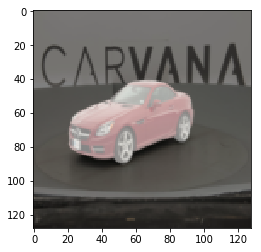

In [37]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import os
from subprocess import check_output
import numpy as np
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from scipy.misc import imresize

# set the necessary directories
data_dir = "/home/santanu/Downloads/Carvana/train/"
mask_dir = "/home/santanu/Downloads/Carvana/train_masks/"
all_images = os.listdir(data_dir)
# pick which images we will use for testing and which for validation
train_images, validation_images = train_test_split(all_images, train_size=0.8, test_size=0.2)
# utility function to convert greyscale images to rgb
def grey2rgb(img):
    new_img = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_img.append(list(img[i][j])*3)
    new_img = np.array(new_img).reshape(img.shape[0], img.shape[1], 3)
    return new_img


# generator that we will use to read the data from the directory
def data_gen_small(data_dir, mask_dir, images, batch_size, dims):
        """
        data_dir: where the actual images are kept
        mask_dir: where the actual masks are kept
        images: the filenames of the images we want to generate batches from
        batch_size: self explanatory
        dims: the dimensions in which we want to rescale our images
        """
        while True:
            ix = np.random.choice(np.arange(len(images)), batch_size)
            imgs = []
            labels = []
            for i in ix:
                # images
                original_img = load_img(data_dir + images[i])
                resized_img = imresize(original_img, dims+[3])
                array_img = img_to_array(resized_img)/255
                imgs.append(array_img)
                
                # masks
                original_mask = load_img(mask_dir + images[i].split(".")[0] + '_mask.gif')
                resized_mask = imresize(original_mask, dims+[3])
                array_mask = img_to_array(resized_mask)/255
                labels.append(array_mask[:, :, 0])
            imgs = np.array(imgs)
            labels = np.array(labels)
            yield imgs, labels.reshape(-1, dims[0], dims[1], 1)

# example use
train_gen = data_gen_small(data_dir, mask_dir, train_images,32, [128, 128])
validation_gen = data_gen_small(data_dir, mask_dir, validation_images,32, [128, 128])
img, msk = next(train_gen)

plt.imshow(img[0])
plt.imshow(grey2rgb(msk[0]), alpha=0.5)


In [23]:
np.max(msk)

1.0

In [38]:
display_step=10
learning_rate=0.0001

keep_prob = tf.placeholder(tf.float32)
logits = unet_basic(x,weights,biases)
flat_logits = tf.reshape(tensor=logits, shape=(-1, 1))
flat_labels = tf.reshape(tensor=y,shape=(-1, 1))
cross_entropies = tf.nn.sigmoid_cross_entropy_with_logits(logits=flat_logits,
                                                          labels=flat_labels)
cost = tf.reduce_mean(cross_entropies)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model 

## initializing all variables

init = tf.global_variables_initializer()

## Launch the execution Graph

with tf.Session() as sess:
    sess.run(init)
    for batch in xrange(500):
        batch_x,batch_y= next(train_gen)
        sess.run(optimizer, feed_dict={x:batch_x,y:batch_y})
        loss = sess.run([cost],feed_dict={x:batch_x,y:batch_y})
        ## Validation loss and store the result for display at the end
        val_x,val_y = next(validation_gen)
        loss_val = sess.run([cost],feed_dict={x:val_x,y:val_y})
        out_x = sess.run(logits,feed_dict={x:val_x})
        print('batch:',batch,'train loss:',loss,'validation loss:',loss_val)
        
        
          


('batch:', 0, 'train loss:', [0.69293374], 'validation loss:', [0.69293386])
('batch:', 1, 'train loss:', [0.6924817], 'validation loss:', [0.69250089])
('batch:', 2, 'train loss:', [0.69187391], 'validation loss:', [0.69194257])
('batch:', 3, 'train loss:', [0.69084835], 'validation loss:', [0.69092697])
('batch:', 4, 'train loss:', [0.68949431], 'validation loss:', [0.68938953])
('batch:', 5, 'train loss:', [0.68665916], 'validation loss:', [0.68677193])
('batch:', 6, 'train loss:', [0.68218428], 'validation loss:', [0.68244243])
('batch:', 7, 'train loss:', [0.67525178], 'validation loss:', [0.67370713])
('batch:', 8, 'train loss:', [0.66178226], 'validation loss:', [0.66232318])
('batch:', 9, 'train loss:', [0.65055019], 'validation loss:', [0.64410114])
('batch:', 10, 'train loss:', [0.63052344], 'validation loss:', [0.62657964])
('batch:', 11, 'train loss:', [0.63741803], 'validation loss:', [0.6557216])
('batch:', 12, 'train loss:', [0.6305536], 'validation loss:', [0.63500053])

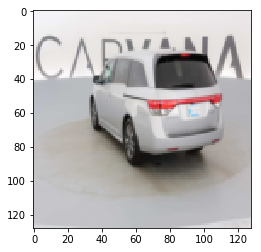

In [55]:
   
plt.imshow(val_x[1])


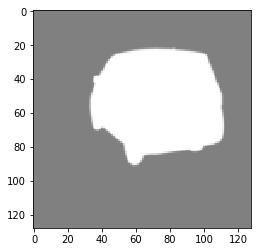

In [56]:
plt.imshow(grey2rgb(val_y[1]), alpha=0.5)

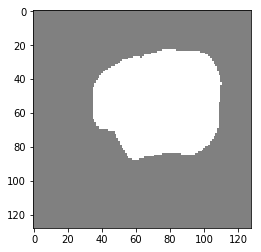

In [57]:
img = (out_x[1] > 0.5)*1.0

plt.imshow(grey2rgb(img),alpha=0.5)

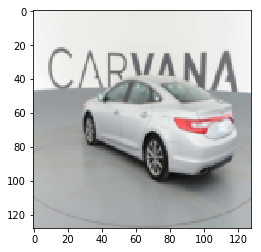

In [64]:
plt.imshow(val_x[0],cmap='gray')

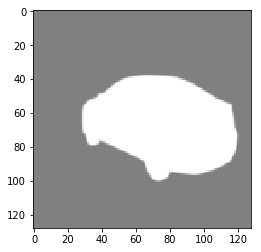

In [60]:
plt.imshow(grey2rgb(val_y[0]), alpha=0.5)

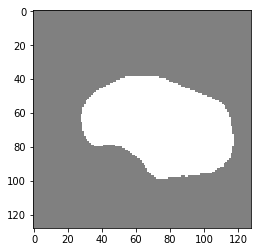

In [61]:
img = (out_x[0] > 0.5)*1.0

plt.imshow(grey2rgb(img),alpha=0.5)